<a href="https://colab.research.google.com/github/sakshamji/Data_Science/blob/master/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [0]:
df=pd.read_csv('iris.data')

In [0]:
df.columns=['sepal_length','sepal_width','petal_length','petal_width','class']

In [5]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [10]:
df.shape

(149, 5)

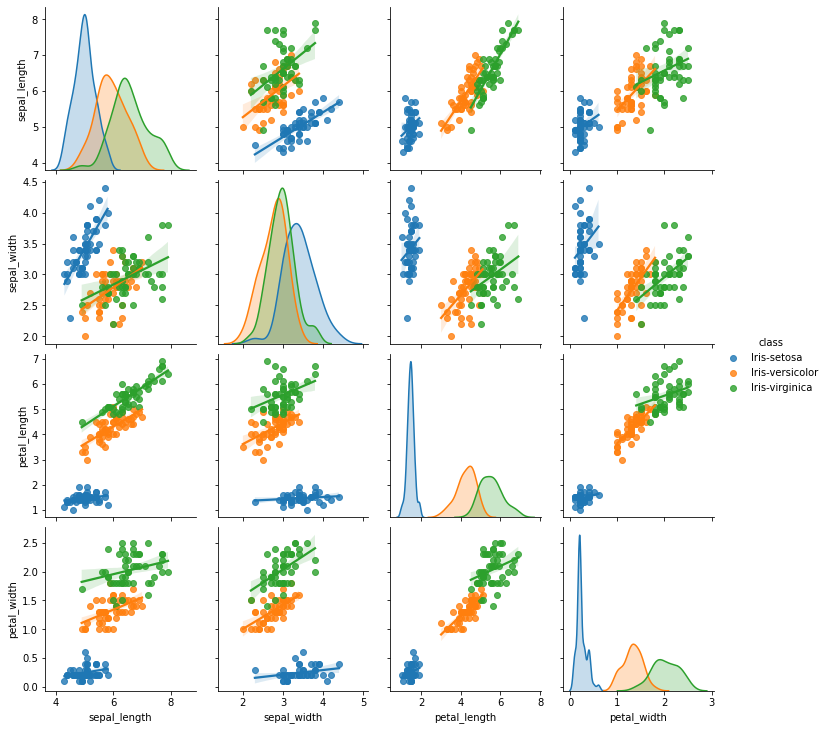

In [17]:
import seaborn as sns
sns.pairplot(df,hue='class',kind='reg')

In [16]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64

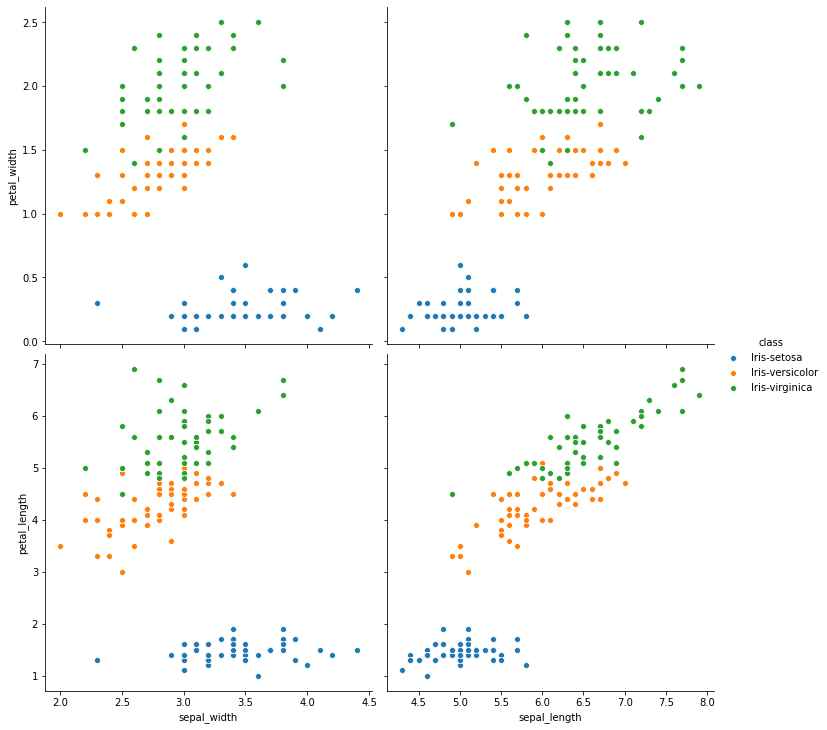

In [20]:
sns.pairplot(df,x_vars=["sepal_width", "sepal_length"],
                 y_vars=["petal_width", "petal_length"],hue='class',height=5)

## Applying k means clustering

In [0]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split


In [0]:
X=df.drop(columns='class')

In [24]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [0]:
y=df['class']
y.head()

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
y = encode.fit_transform(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
y_pred

array([0, 1, 2, 3, 0, 1, 0, 2, 3, 0, 0, 1, 1, 1, 1, 3, 0, 0, 0, 2, 1, 2,
       1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 3, 1, 1, 3, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 3, 0, 2, 0, 2], dtype=int32)

In [42]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,average='weighted')

0.21333333333333332

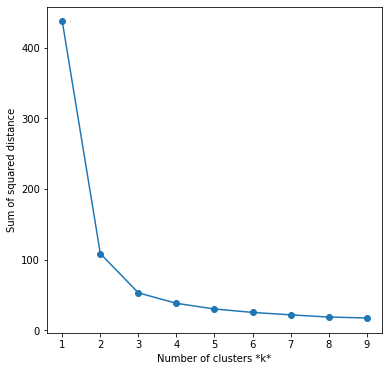

In [43]:


sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_train)
    sse.append(km.inertia_)

# Plot 
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [51]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
y_pred

array([0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 2, 0, 2], dtype=int32)

In [52]:
f1_score(y_test, y_pred,average='macro')

0.2795698924731183

## Applying Logistic Regression

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
model = LogisticRegression()

model.fit(X_train,y_train)

predict = model.predict(X_test)

In [61]:
print('\n\nAccuracy Score on test data : \n\n')
print(accuracy_score(y_test,predict))



Accuracy Score on test data : 


0.92


The result is satisfying thus we have succesfully classified the species